In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report



In [2]:
# Read in CSV file
perth_houses_df = pd.read_csv("Resources/all_perth_310121.csv")

# Review the DataFrame
perth_houses_df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


### Data PreProcessing and Cleaning

In [3]:
perth_houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [4]:
#find the datatypes
perth_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
#find null values of any of the columns
perth_houses_df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [6]:
#change garage 'NULL' to mean figure of 2 and Build year to mean of 1989
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].fillna(2)
perth_houses_df.tail(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,NaN,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [7]:
#change garage and build_year columns from float to integer
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].astype(int)
perth_houses_df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [8]:
#check breakdown of number of garages per house
perth_houses_df["GARAGE"].value_counts()

2     23202
1      5290
3      2042
4      1949
6       466
5       362
8       129
7        97
12       30
10       26
9        17
14       13
13        8
11        7
16        4
18        3
20        3
99        1
31        1
26        1
17        1
50        1
21        1
22        1
32        1
Name: GARAGE, dtype: int64

In [9]:
# remove all Garage values of <2
# value_counts = perth_houses_df['GARAGE'].value_counts()
# filter_classification = value_counts[value_counts >1]
# print(filter_classification)

In [10]:
#check breakdown of number of bedrooms per house
perth_houses_df["BEDROOMS"].value_counts()


4     17635
3     11617
5      2476
2      1457
6       296
1        95
7        53
8        21
9         4
10        2
Name: BEDROOMS, dtype: int64

In [11]:
#check breakdown of number of bathrooms per house
perth_houses_df["BATHROOMS"].value_counts()


2     22264
1      8839
3      2284
4       229
5        30
6         7
7         2
16        1
Name: BATHROOMS, dtype: int64

In [12]:
#drop columns not required for ML 
perth_houses_cleaned_df = perth_houses_df.drop(['ADDRESS','CBD_DIST','NEAREST_STN_DIST','BUILD_YEAR','DATE_SOLD','LATITUDE','LONGITUDE','NEAREST_SCH_DIST','NEAREST_SCH_RANK'], axis=1)
perth_houses_cleaned_df.head()


,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,NEAREST_STN,POSTCODE,NEAREST_SCH
0,South Lake,565000,4,2,2,600,160,Cockburn Central Station,6164,LAKELAND SENIOR HIGH SCHOOL
1,Wandi,365000,3,2,2,351,139,Kwinana Station,6167,ATWELL COLLEGE
2,Camillo,287000,3,1,1,719,86,Challis Station,6111,KELMSCOTT SENIOR HIGH SCHOOL
3,Bellevue,255000,2,1,2,651,59,Midland Station,6056,SWAN VIEW SENIOR HIGH SCHOOL
4,Lockridge,325000,4,1,2,466,131,Bassendean Station,6054,KIARA COLLEGE


In [13]:
perth_houses_cleaned_df.isnull().sum()

SUBURB         0
PRICE          0
BEDROOMS       0
BATHROOMS      0
GARAGE         0
LAND_AREA      0
FLOOR_AREA     0
NEAREST_STN    0
POSTCODE       0
NEAREST_SCH    0
dtype: int64

### Split Data into Training and Test Sets

In [14]:
# Separate the y variable, the labels
y = perth_houses_cleaned_df["PRICE"]

# Separate the X variable, the features
X = perth_houses_cleaned_df.drop(columns="PRICE")

In [15]:
# Review the y variable Series
y[:5]

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

In [16]:
# Review the X variable DataFrame
X[:5]

,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,NEAREST_STN,POSTCODE,NEAREST_SCH
0,South Lake,4,2,2,600,160,Cockburn Central Station,6164,LAKELAND SENIOR HIGH SCHOOL
1,Wandi,3,2,2,351,139,Kwinana Station,6167,ATWELL COLLEGE
2,Camillo,3,1,1,719,86,Challis Station,6111,KELMSCOTT SENIOR HIGH SCHOOL
3,Bellevue,2,1,2,651,59,Midland Station,6056,SWAN VIEW SENIOR HIGH SCHOOL
4,Lockridge,4,1,2,466,131,Bassendean Station,6054,KIARA COLLEGE


In [17]:
X = pd.get_dummies(X)
X[:5]

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,POSTCODE,SUBURB_Alexander Heights,SUBURB_Alfred Cove,SUBURB_Alkimos,SUBURB_Anketell,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,4,2,2,600,160,6164,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,2,351,139,6167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,719,86,6111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,651,59,6056,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,466,131,6054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


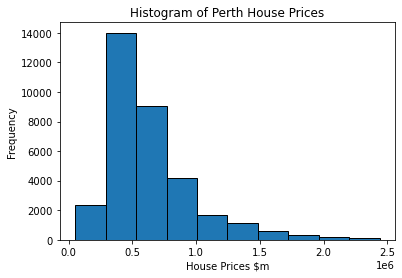

In [18]:
# create a histogram for the y values
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel('House Prices $m')
plt.ylabel('Frequency')
plt.title('Histogram of Perth House Prices')
plt.show()



### Split Data into Training and Test Datasets

In [19]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape   

(25242, 555)

### Create a Logistic Regression Model with the Cleaned Data

In [20]:
# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=500, random_state=1)
logistic_regression_model

LogisticRegression(max_iter=500, random_state=1)

In [21]:
# fit the model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\sabac\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:
# Use the Test data to make a prediction
lr_model.predict(X_test)

array([ 430000,  545000,  500000, ...,  550000,  500000, 1100000],
      dtype=int64)

In [23]:
 # Score the model
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.013786546232469693
Testing Data Score: 0.01342999762300927


TypeError: '(slice(None, None, None), 0)' is an invalid key

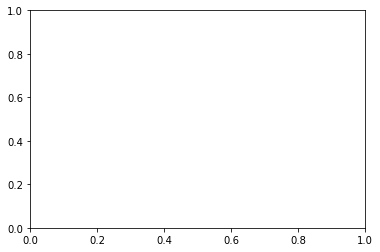

In [24]:

# Get the number of features
num_features = X_train.shape[1]

# Create a figure and axes for the line chart
fig, ax = plt.subplots()

# Iterate over each feature
for i in range(num_features):
    # Get the values of the feature in x_train and x_test
    train_values = X_train[:, i]
    test_values = X_test[:, i]

    # Generate the x-axis indices
    indices = np.arange(len(train_values))

    # Plot the feature values as lines
    ax.plot(indices, train_values, label='x_train Feature {}'.format(i+1))
    ax.plot(indices, test_values, label='x_test Feature {}'.format(i+1))

# Set the title, x-label, and y-label
ax.set_title('Comparison of x_train and x_test')
ax.set_xlabel('Index')
ax.set_ylabel('Feature Values')

# Display the legend
ax.legend()

# Show the plot
plt.show()
